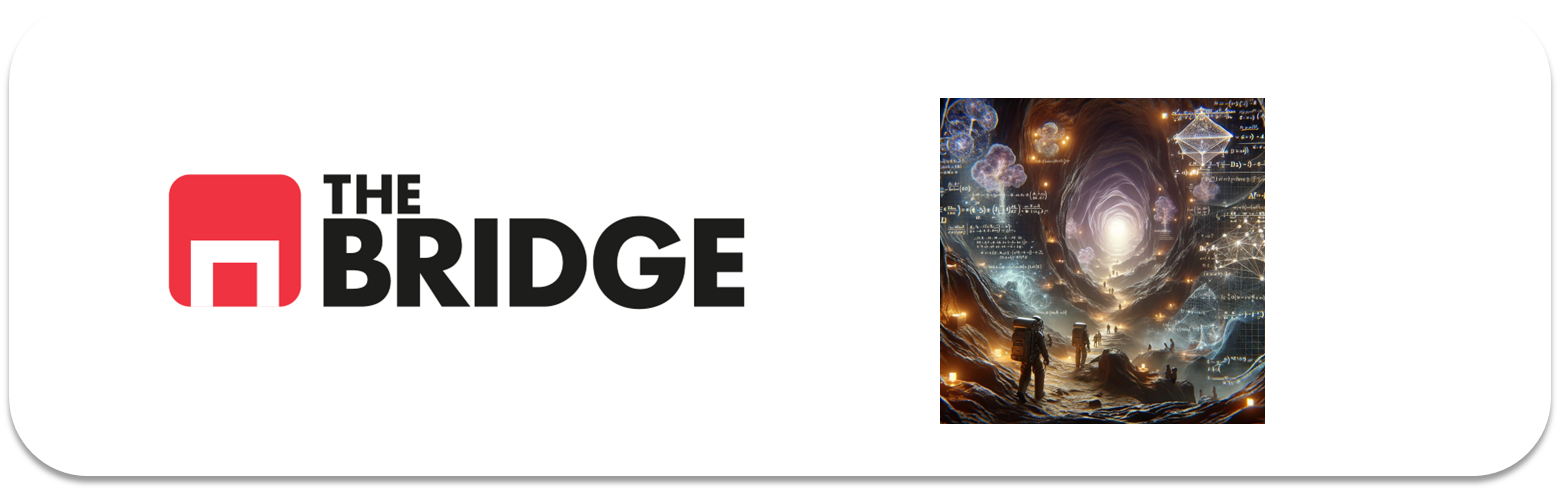

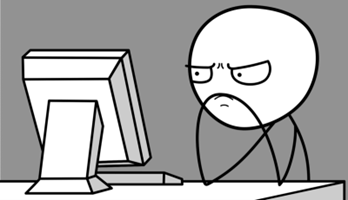

Para ejercitarte y afianzar lo aprendido sobre nuestra **Introducción a Deep Learning**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

**EN PROCESO DE CARGA**

# Bank marketing dataset - Depósito a plazo fijo

En este notebook vamos repasar un modelo que ya hicimos en anteriores ocasiones que nos permitía predecir si un individuo dependiendo de sus características, así como características de la campaña de marketing a la cual se pretende asignarlo, va a adquirir un servicio bancario (en este caso, un depósito a plazo fijo). El objetivo de este ejercicio será, mas allá de obtener un modelo preciso o hacer un análisis de datos exhaustivo, observar las posibles diferencias entre el utilizar un modelo de regresión logística o uno de MLP (multi-layer perceptron) para predecir nuestra variable categórica (sí adquiere, no adquiere).

Obtenemos los datos a partir del "*UCI Machine Learning repository*".

### *Features*:

#### Datos del cliente:

1. **age** (edad)
2. **job** (tipo de trabajo)
3. **marital** (estado marital)
4. **education** (nivel de eduación)
5. **default** (fallo en pagar una deuda)
6. **housing** (si tiene un préstamo de vivienda)
7. **loan** (si tiene un préstamo personal)
8. **balance** (balance personal)

#### Datos del último contacto de la campaña de marketing en curso:

9. **contact** (tipo de contacto)
10. **month** (último mes de contacto)
11. **day** (último día de contacto)
12. **duration** (duración de la llamada en segundos; duration = 0 significa no contactados)

#### Otros

13. **campaign** (número de contactos al cliente hechos en esta campaña)
14. **pdays** (número de días que han pasado desde que el cliente fue contactado en una campaña anterior; 999 o -1 significa que el cliente no ha sido contactado)
15. **previous** (número de contactos realizados antes de esta campaña a el cliente)
16. **poutcome** (resultado de la campaña anterior)
17. **deposit** (target)

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicios 1

Importa los datos y echa un vistazo rápido. Selecciona la variable target y asignala a una variable "target".

In [2]:
df = pd.read_csv('./data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Ejercicio 2

Haz el split en train y test y analiza el target.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
target = 'deposit'

In [6]:
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df[target], random_state=42)

<Axes: xlabel='deposit', ylabel='percent'>

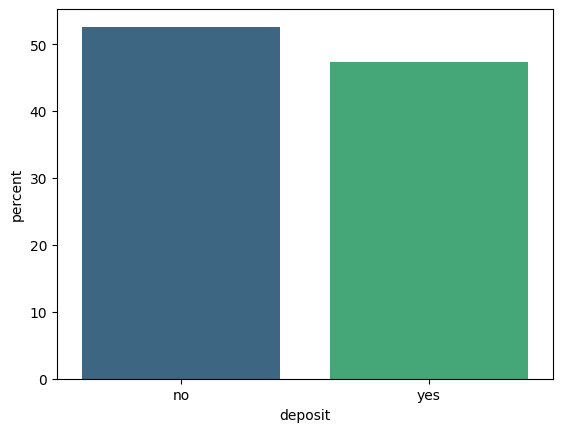

In [7]:
sns.countplot(train_set, x=target, hue=target, stat='percent', palette='viridis')

In [8]:
train_set[target].value_counts(True)

no     0.526151
yes    0.473849
Name: deposit, dtype: float64

- Quite a balanced dataset in terms of the target
- It needs binarizing

In [9]:
for set in train_set, test_set:
    set['deposit'] = set['deposit'].map({'yes': 1, 'no': 0})

### Ejercicio 3

Tienes múltiples variables tipo object y algunas numéricas, en este caso quédate solo con las variables numéricas y el target. Observa las distribuciones de dichas variables numéricas

In [10]:
import viztools as viz

numFeatures = [col for col in df.select_dtypes(include=np.number)]

age


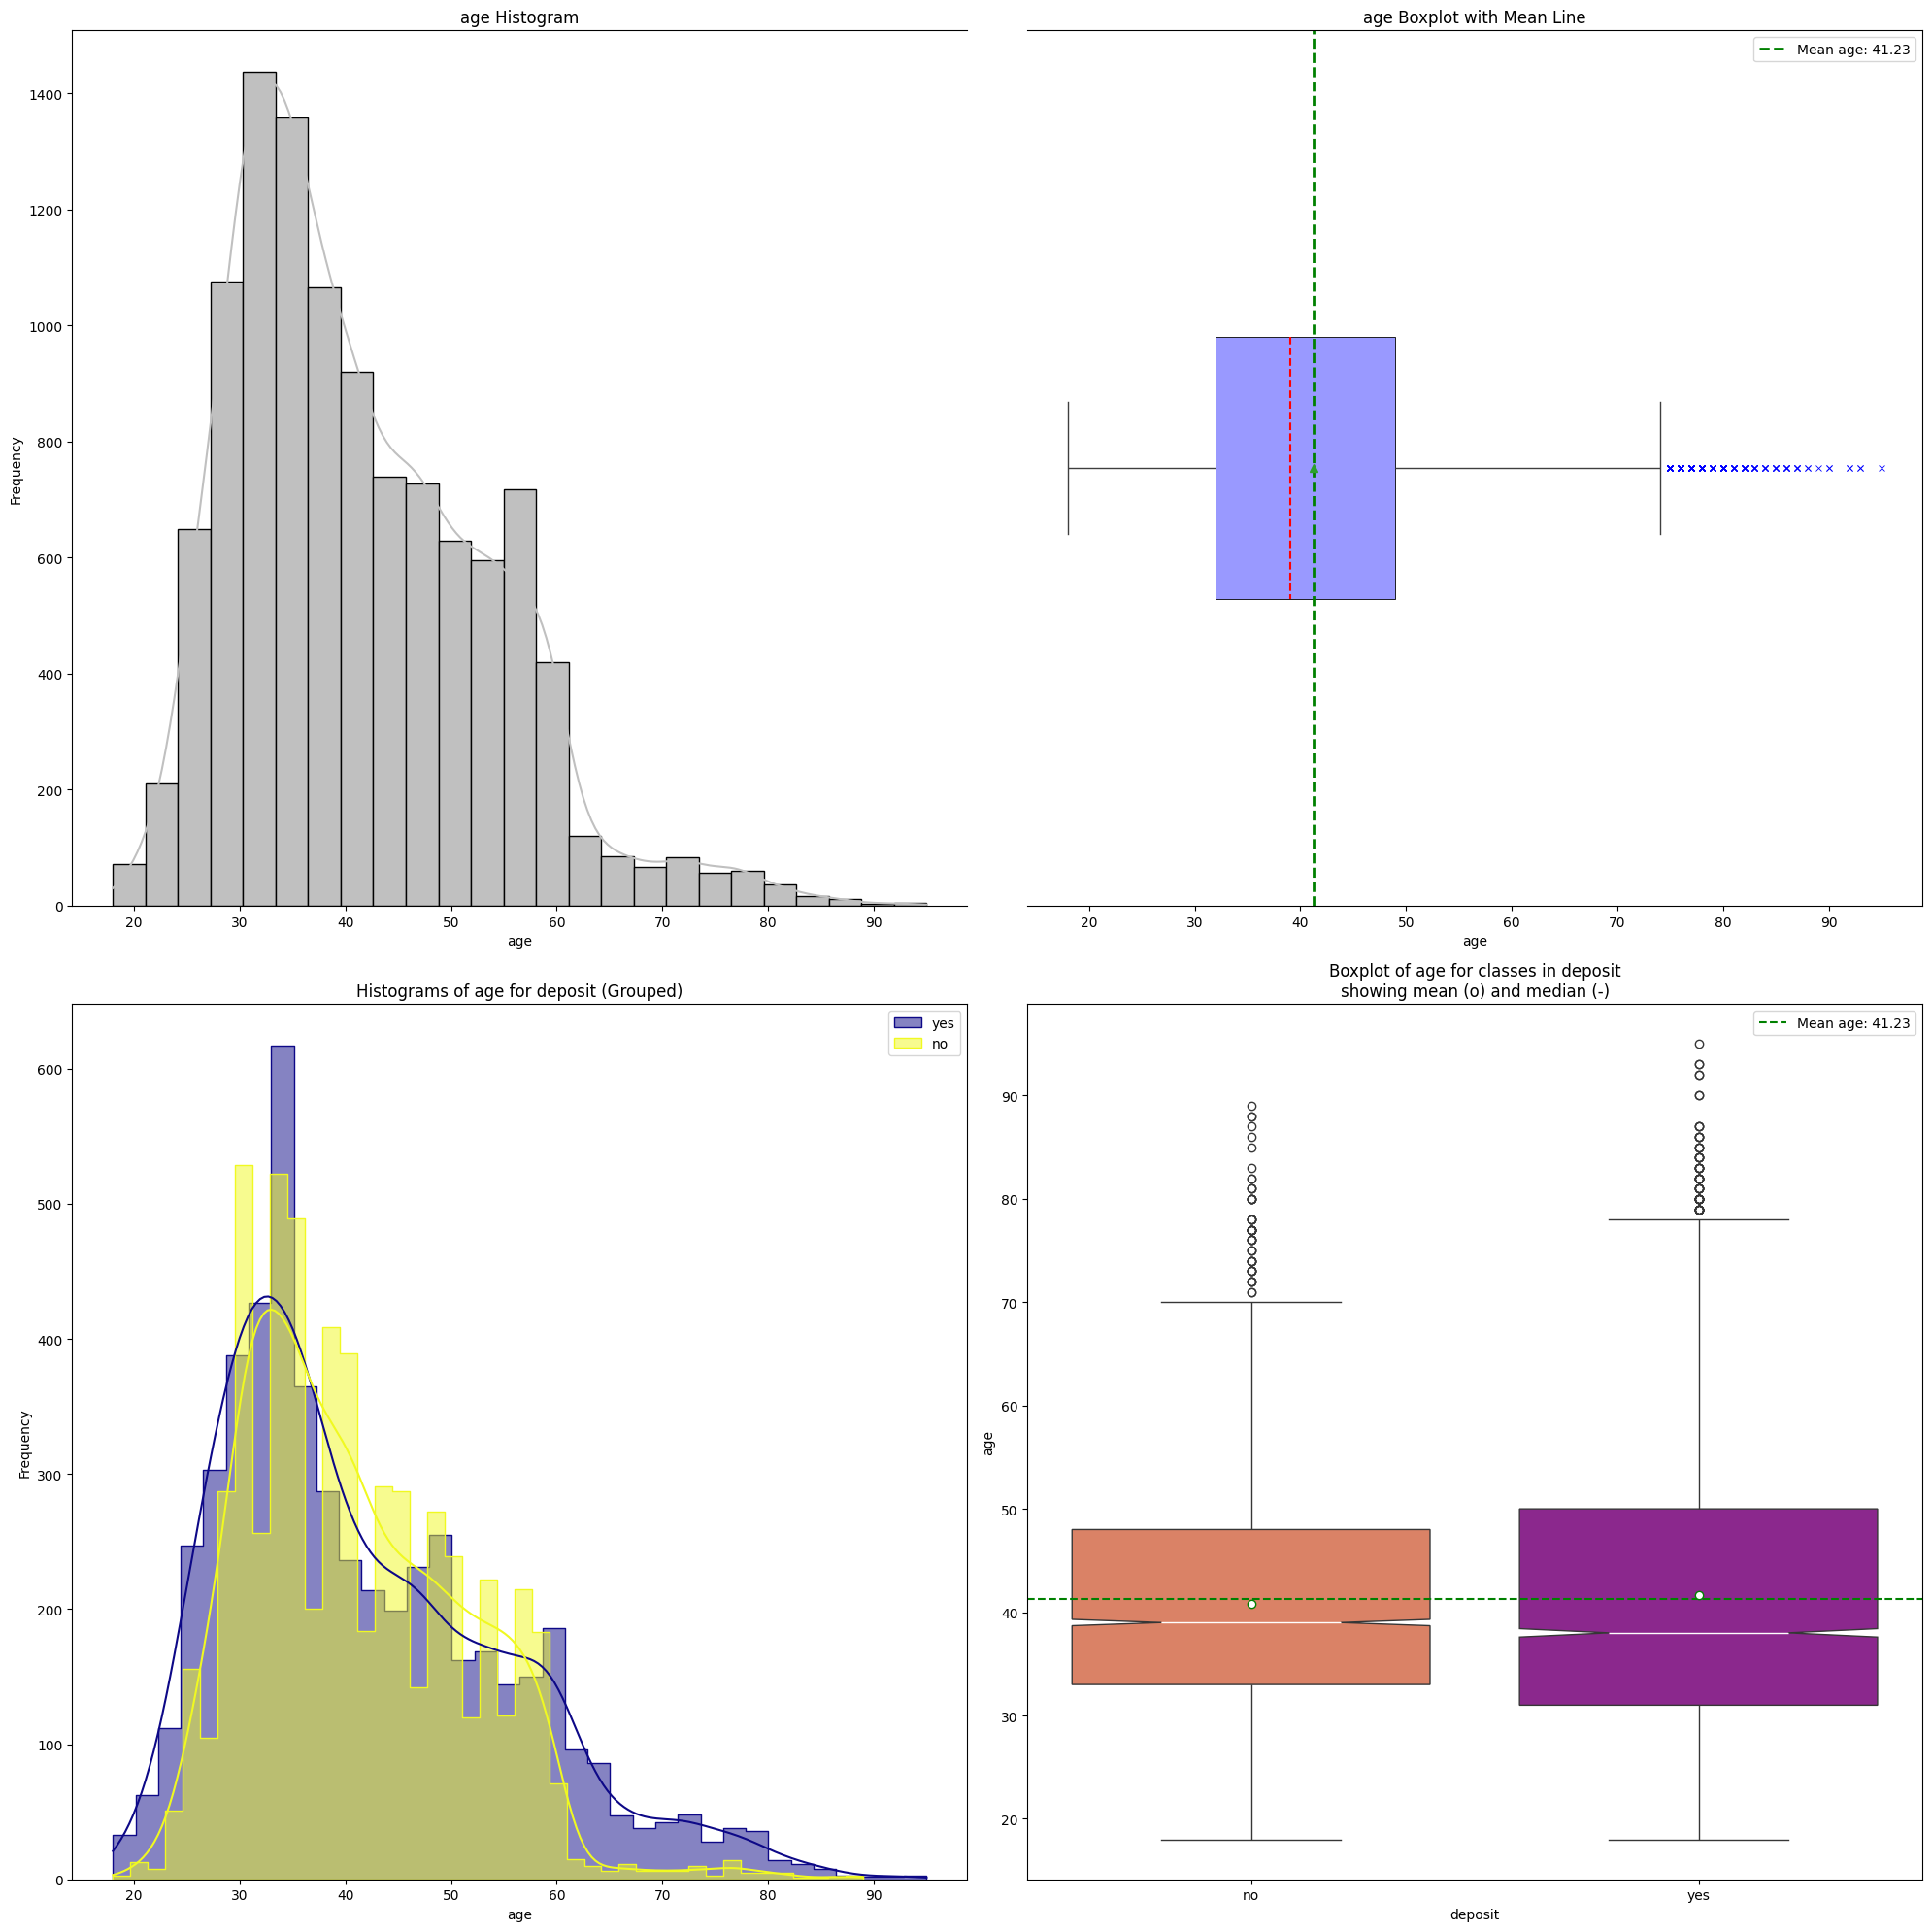

balance


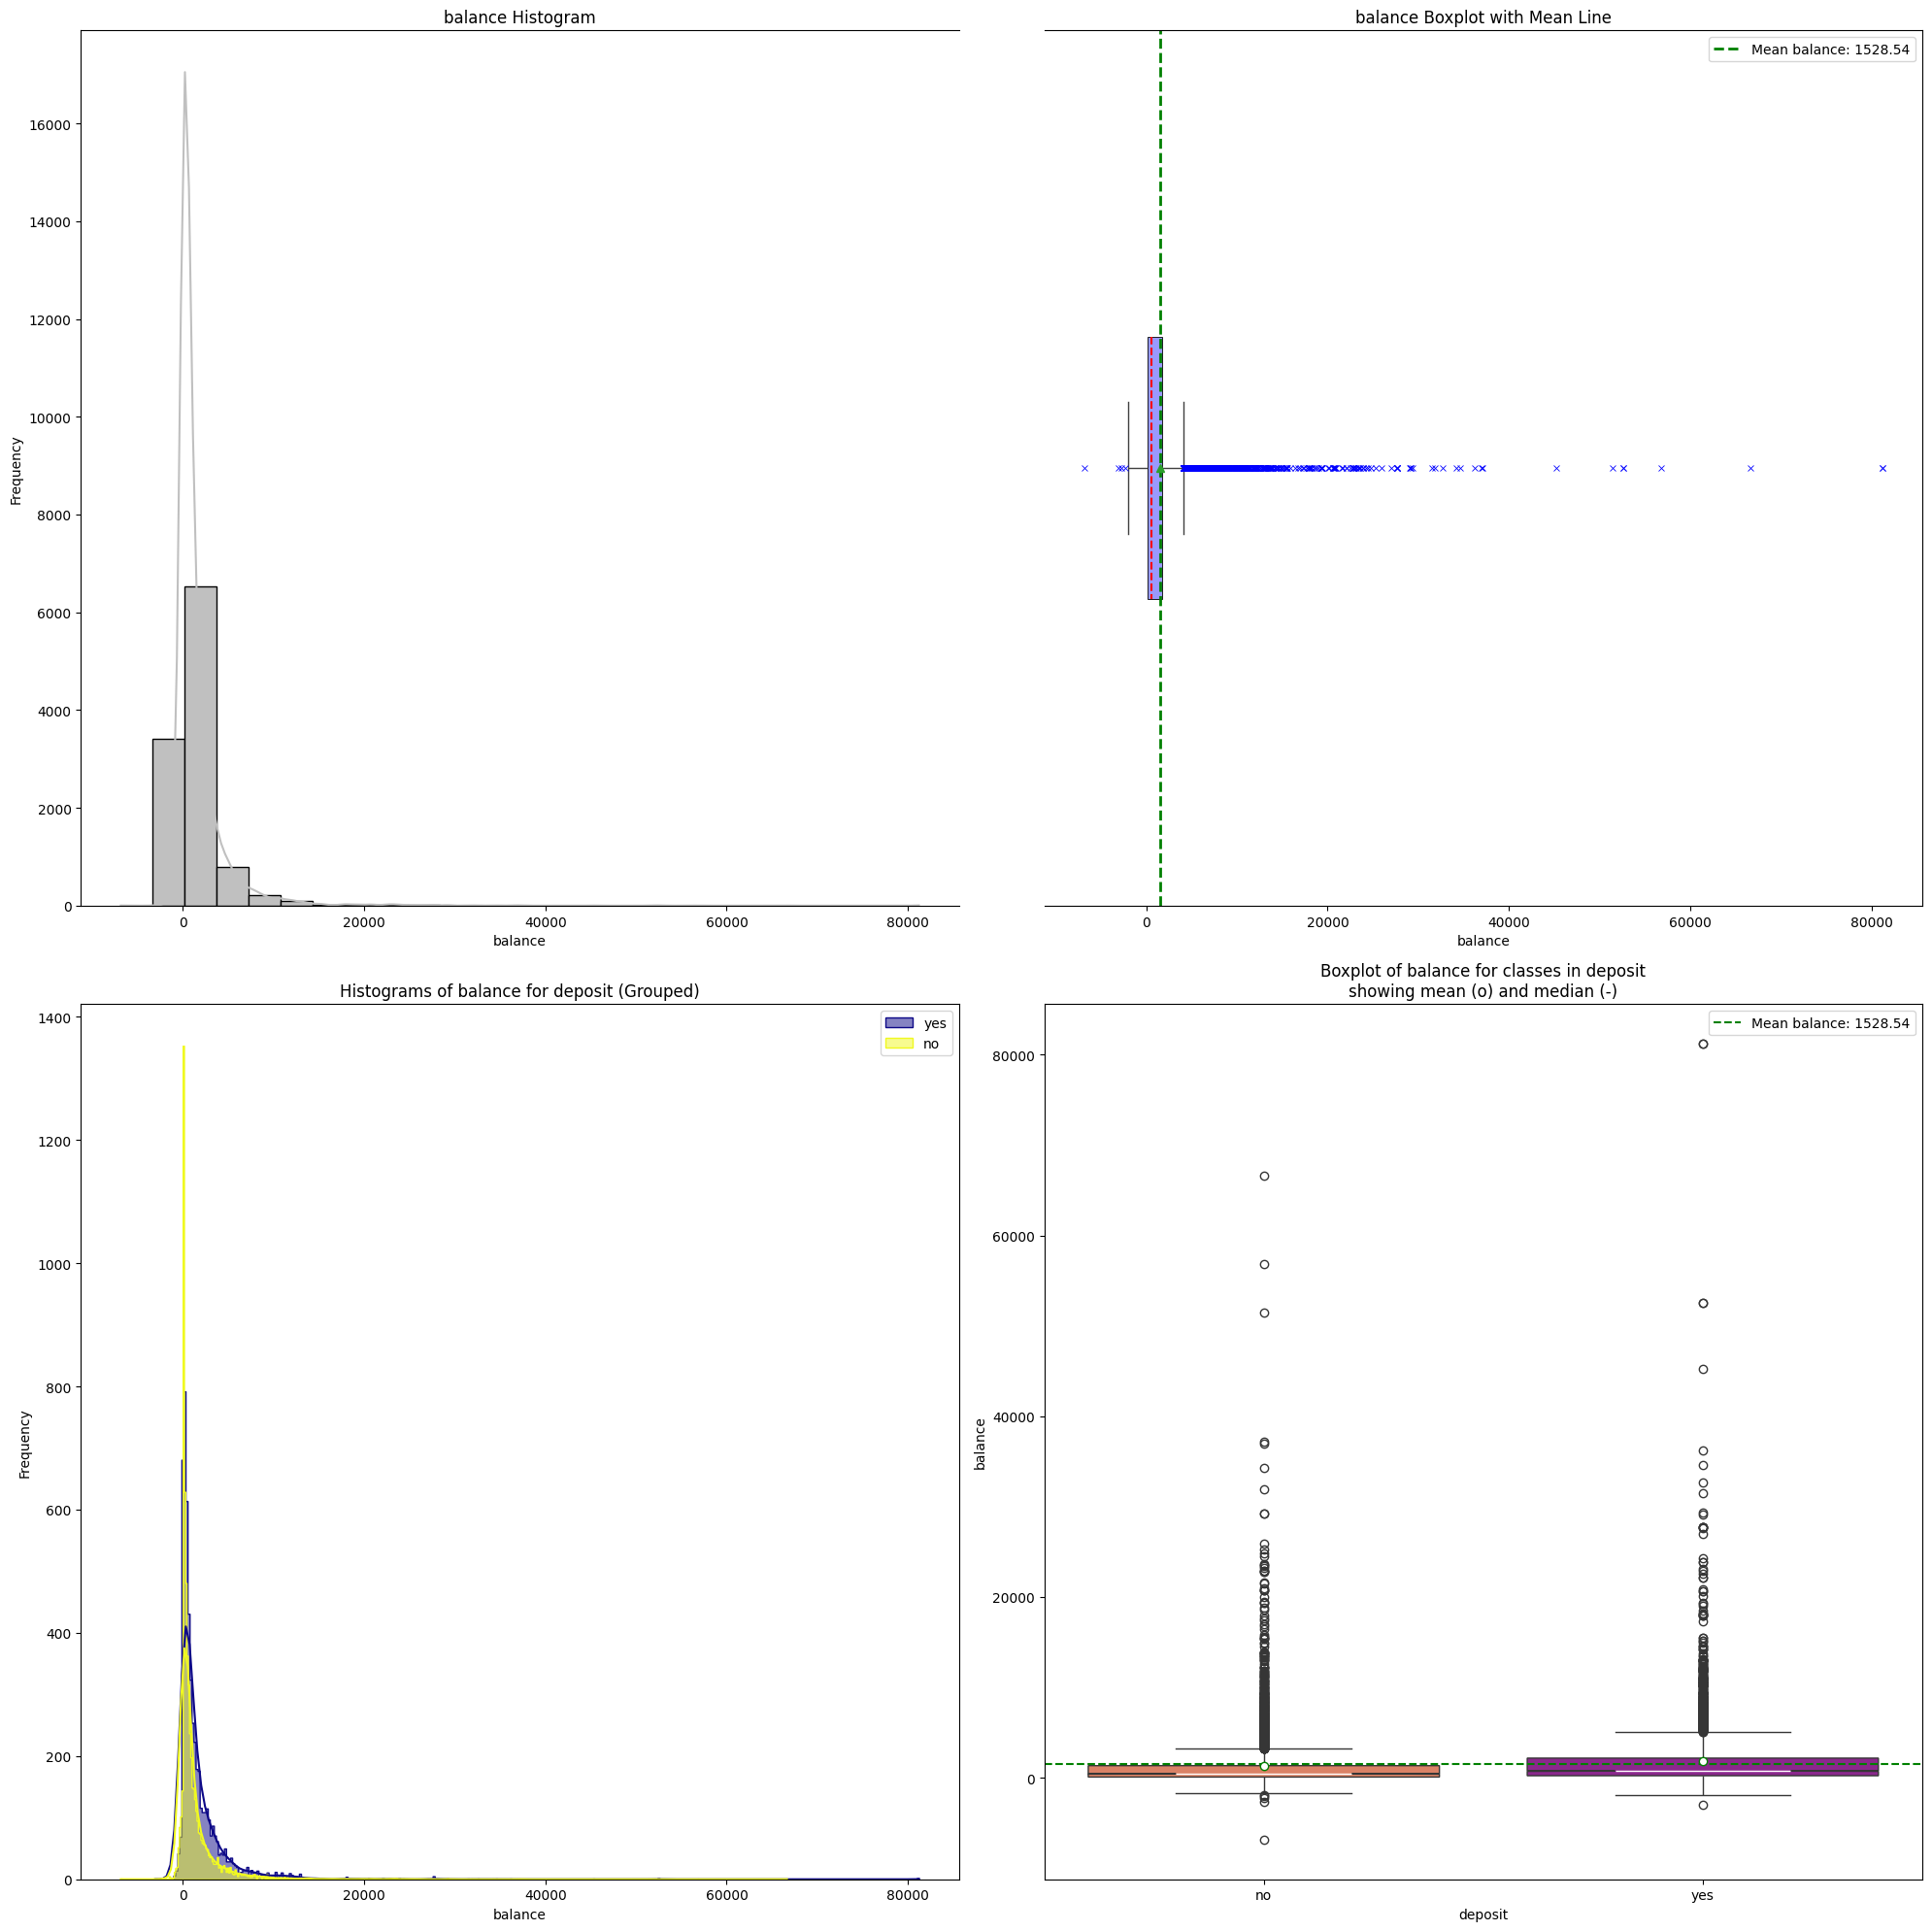

day


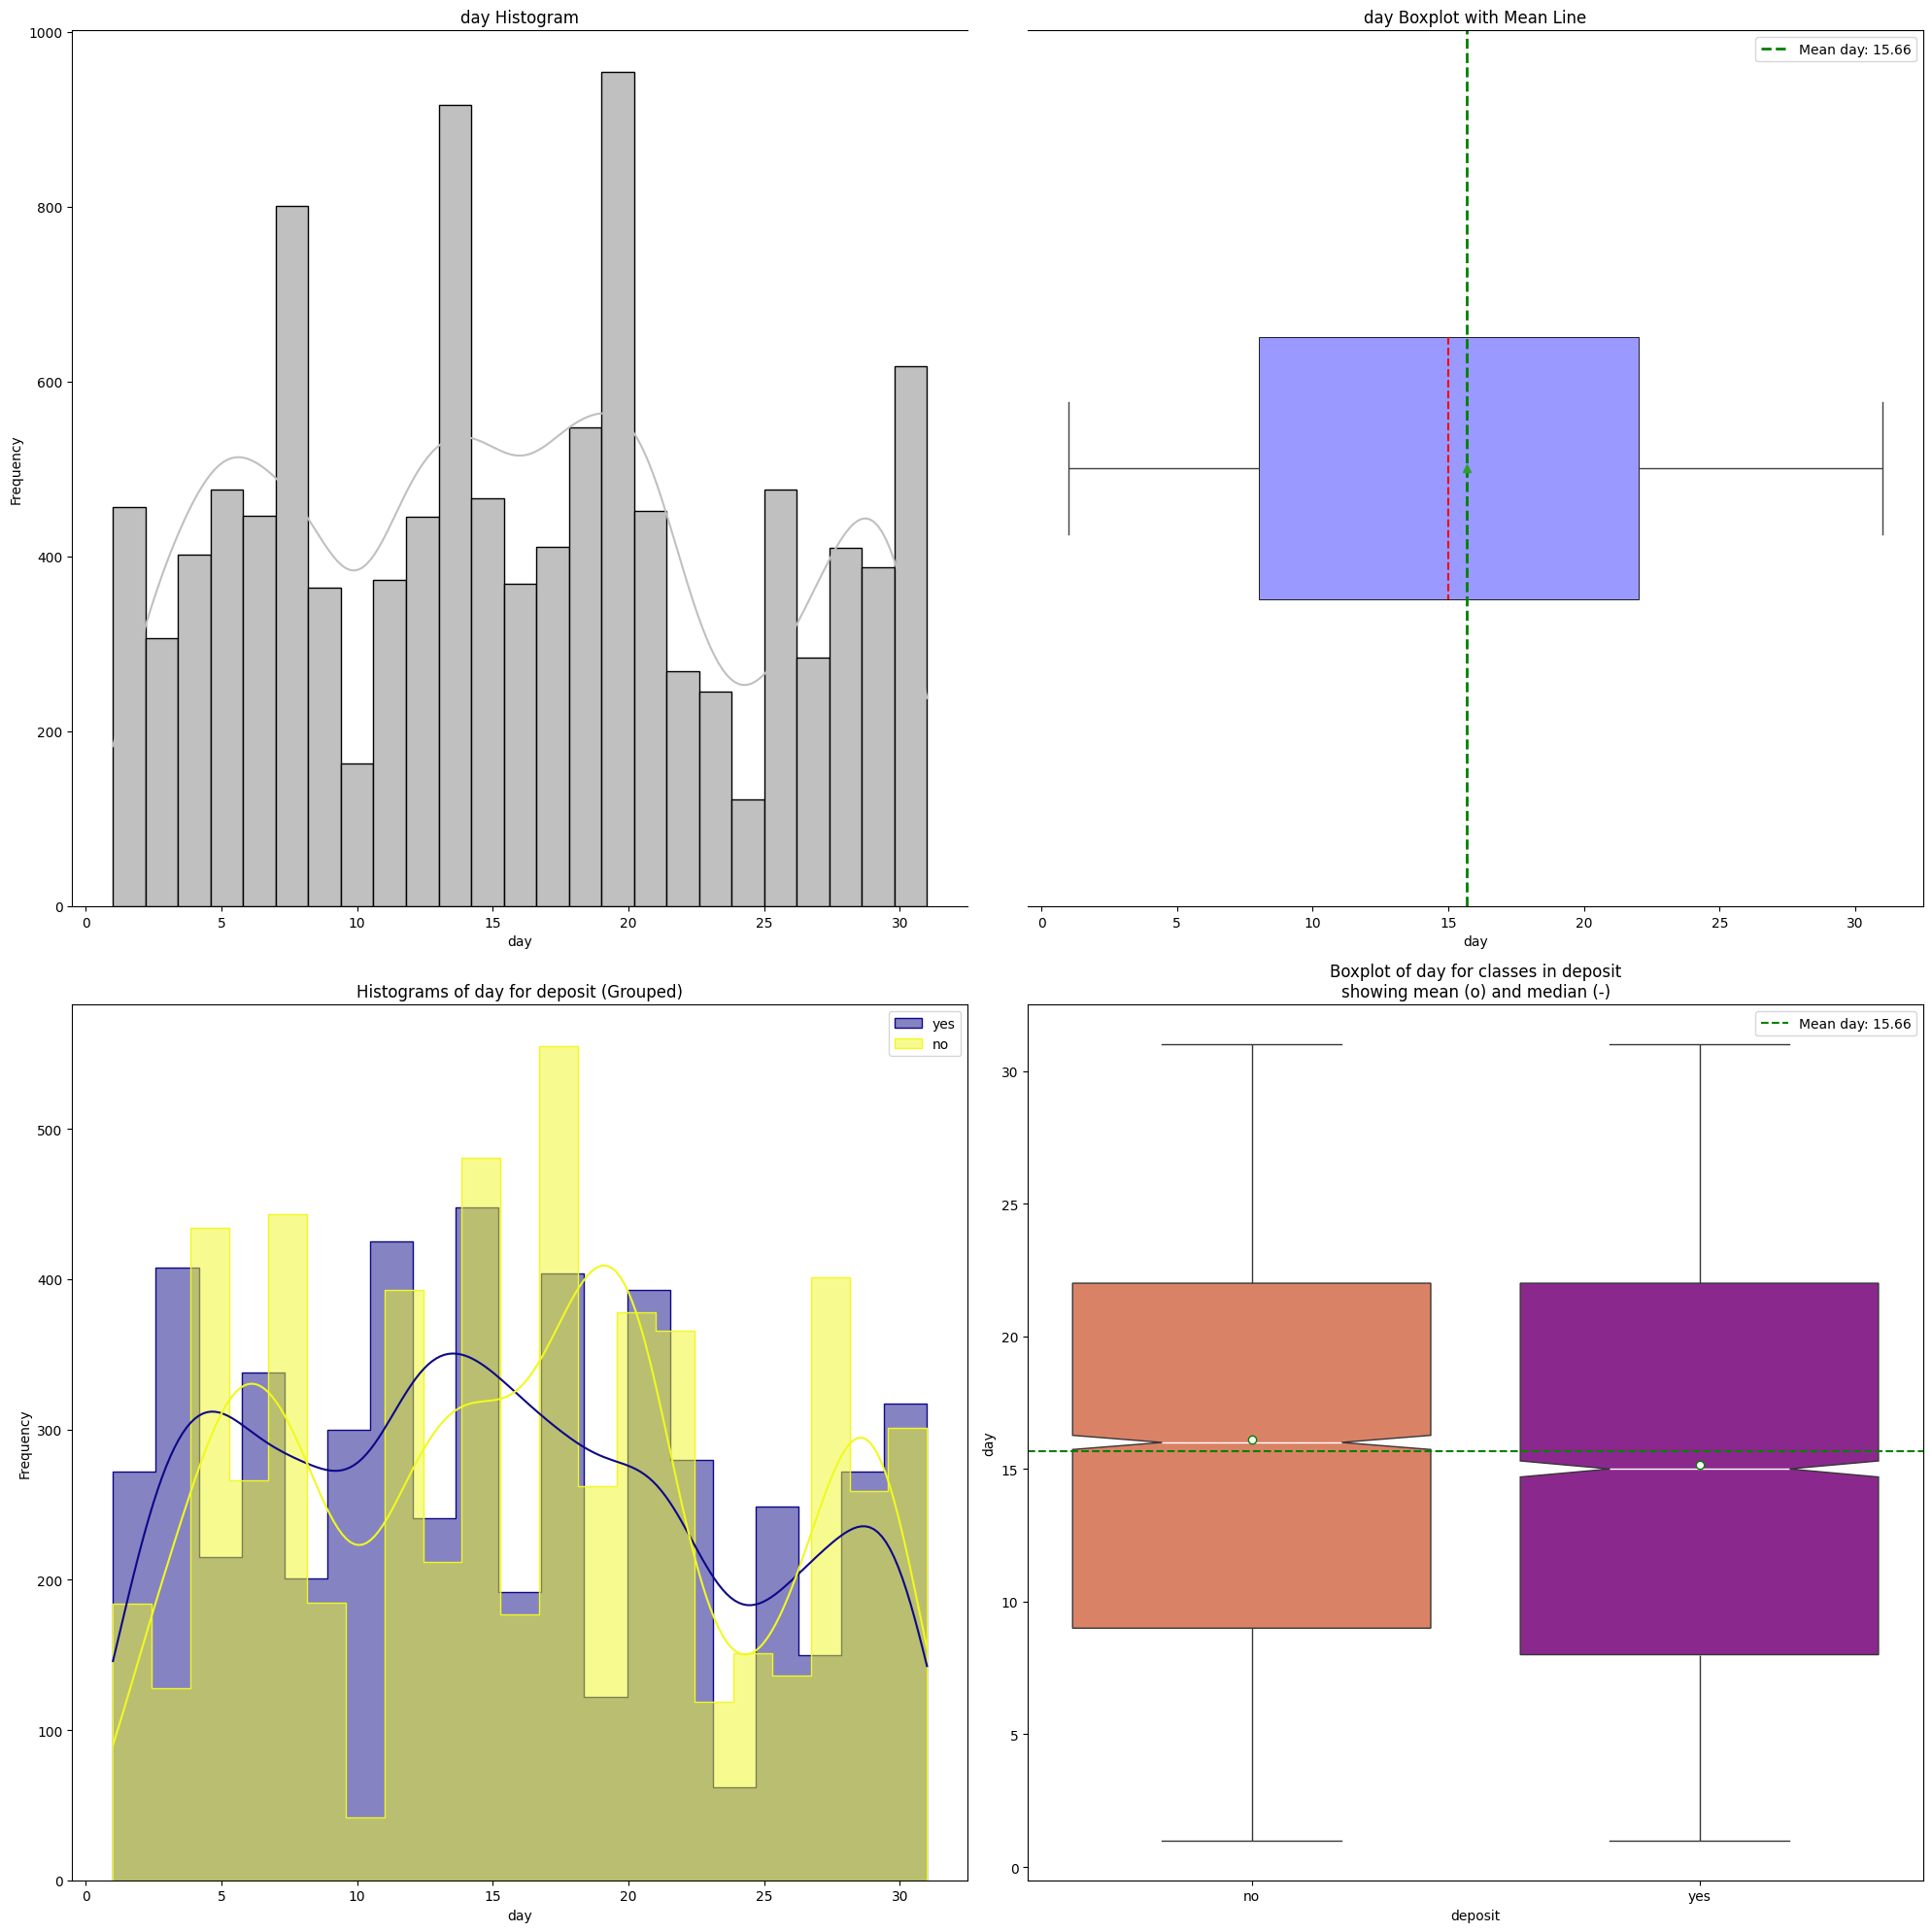

duration


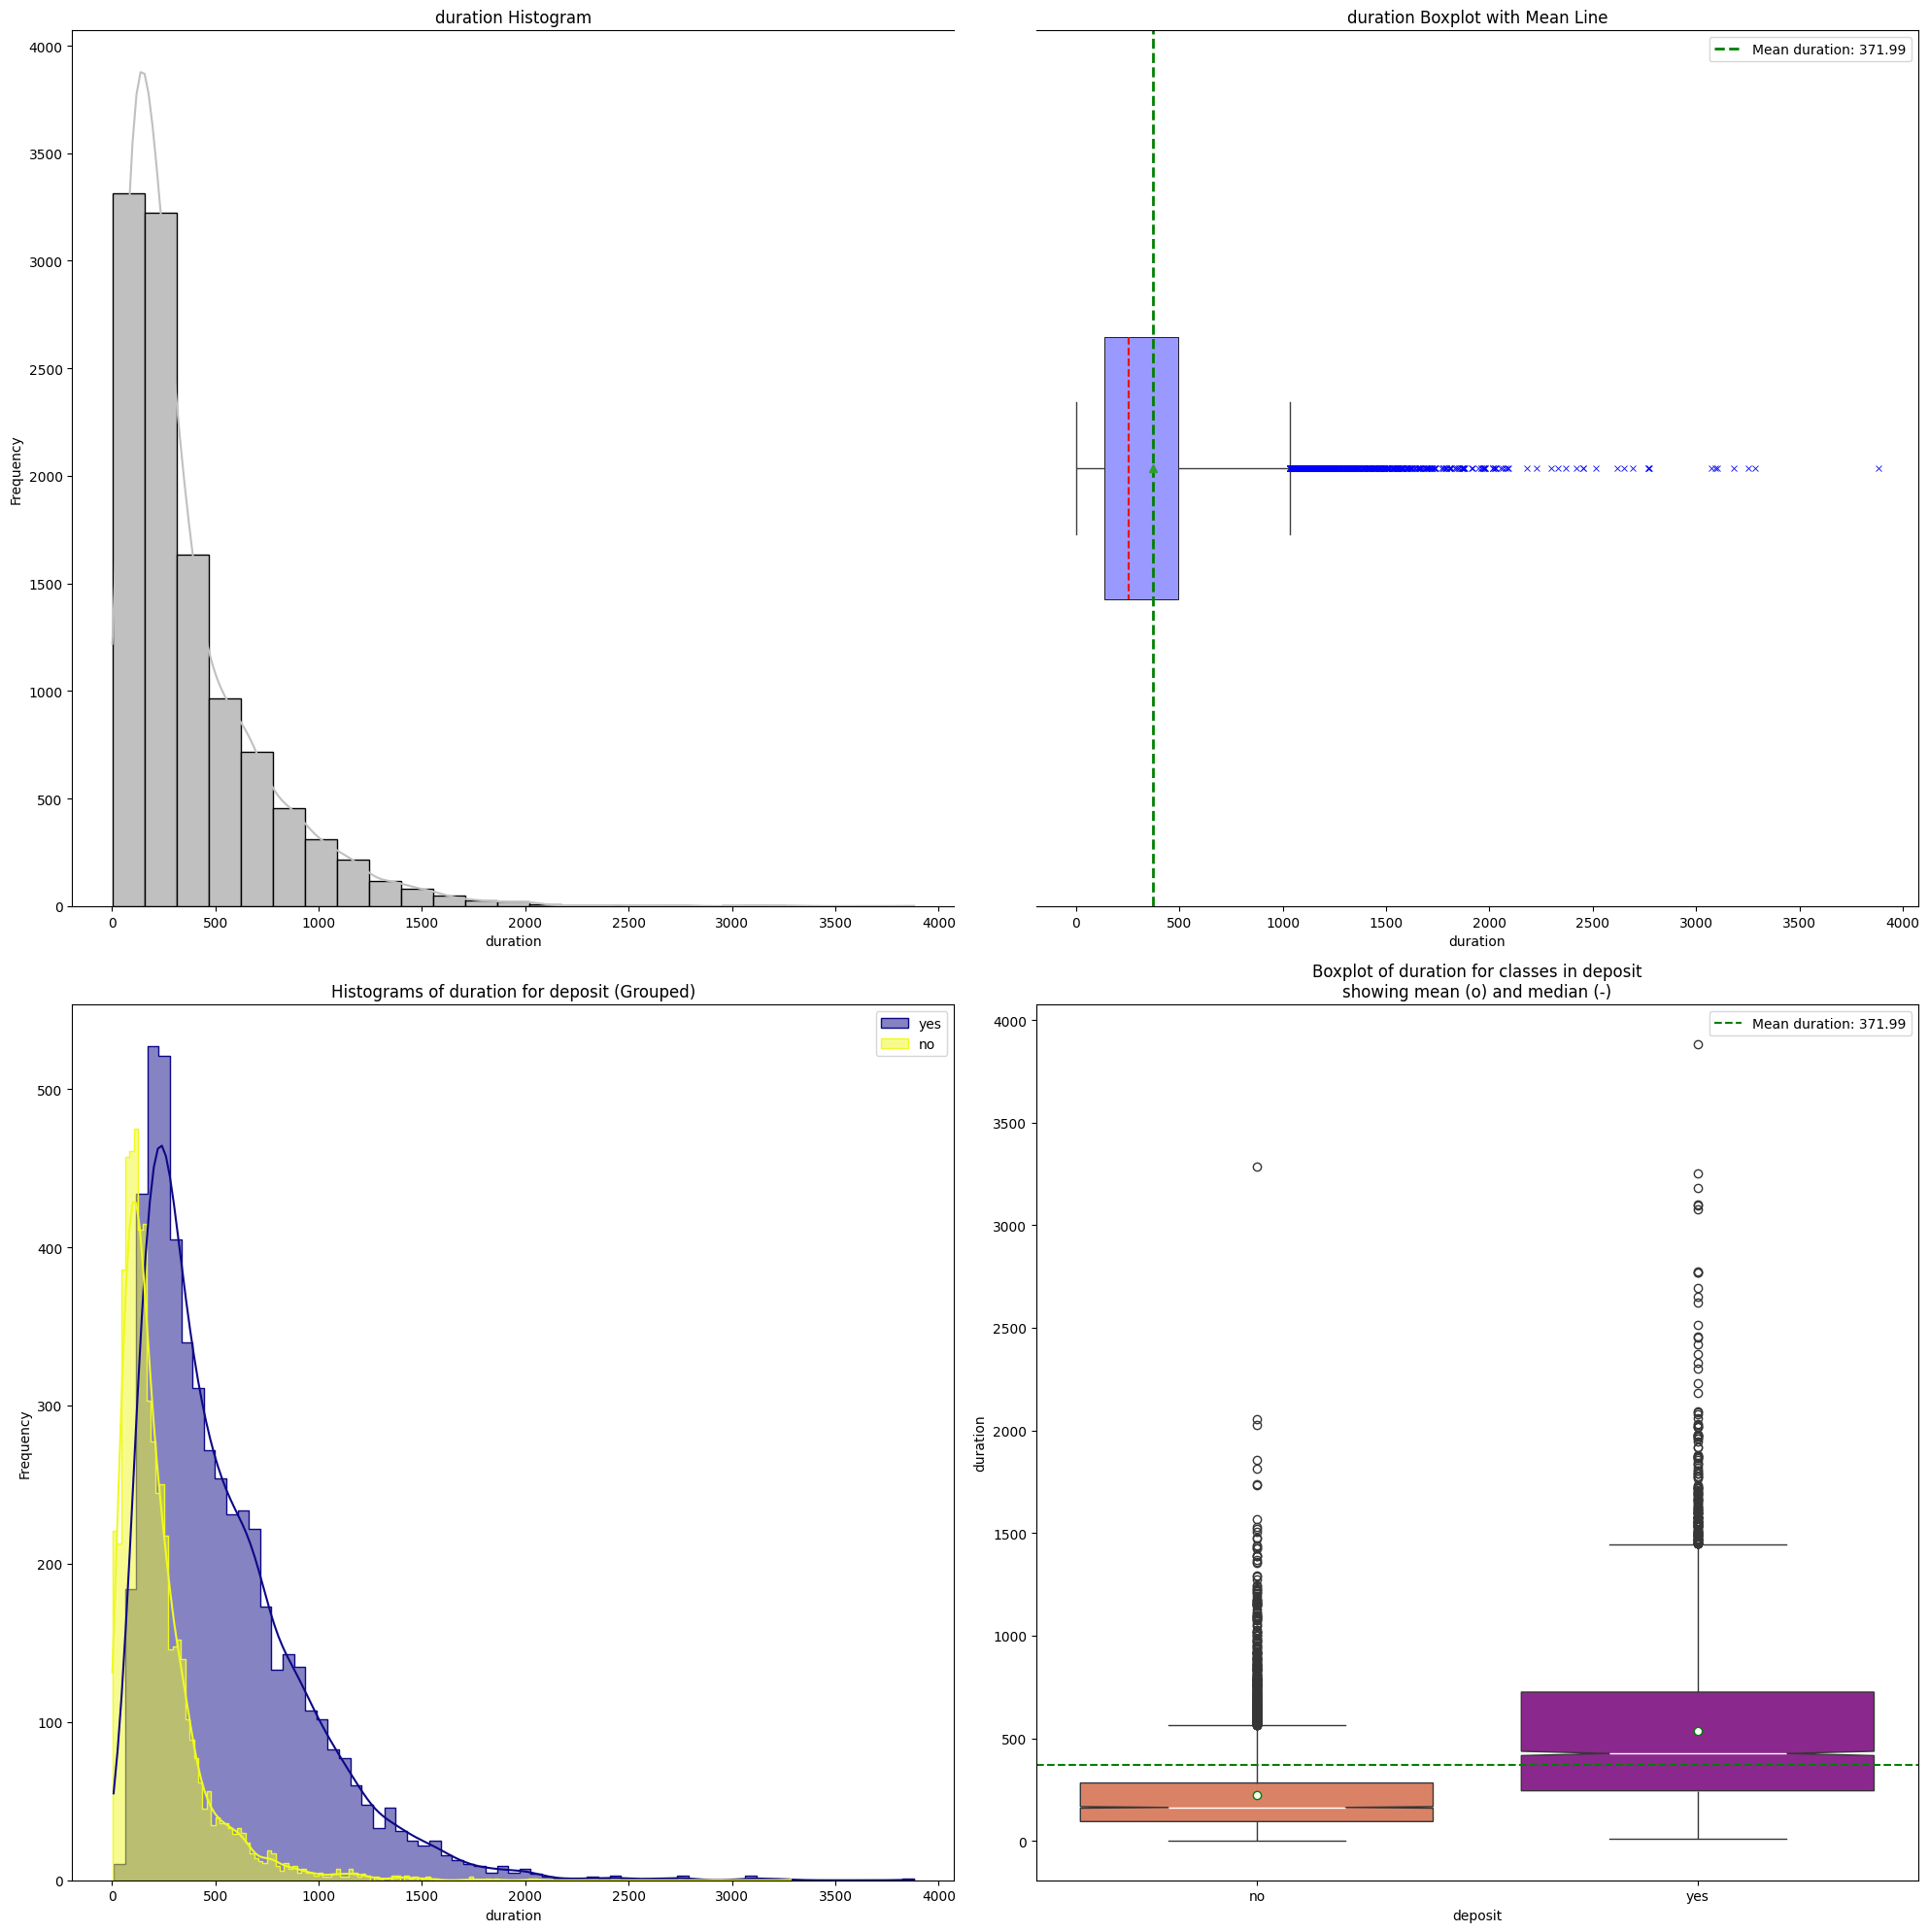

campaign


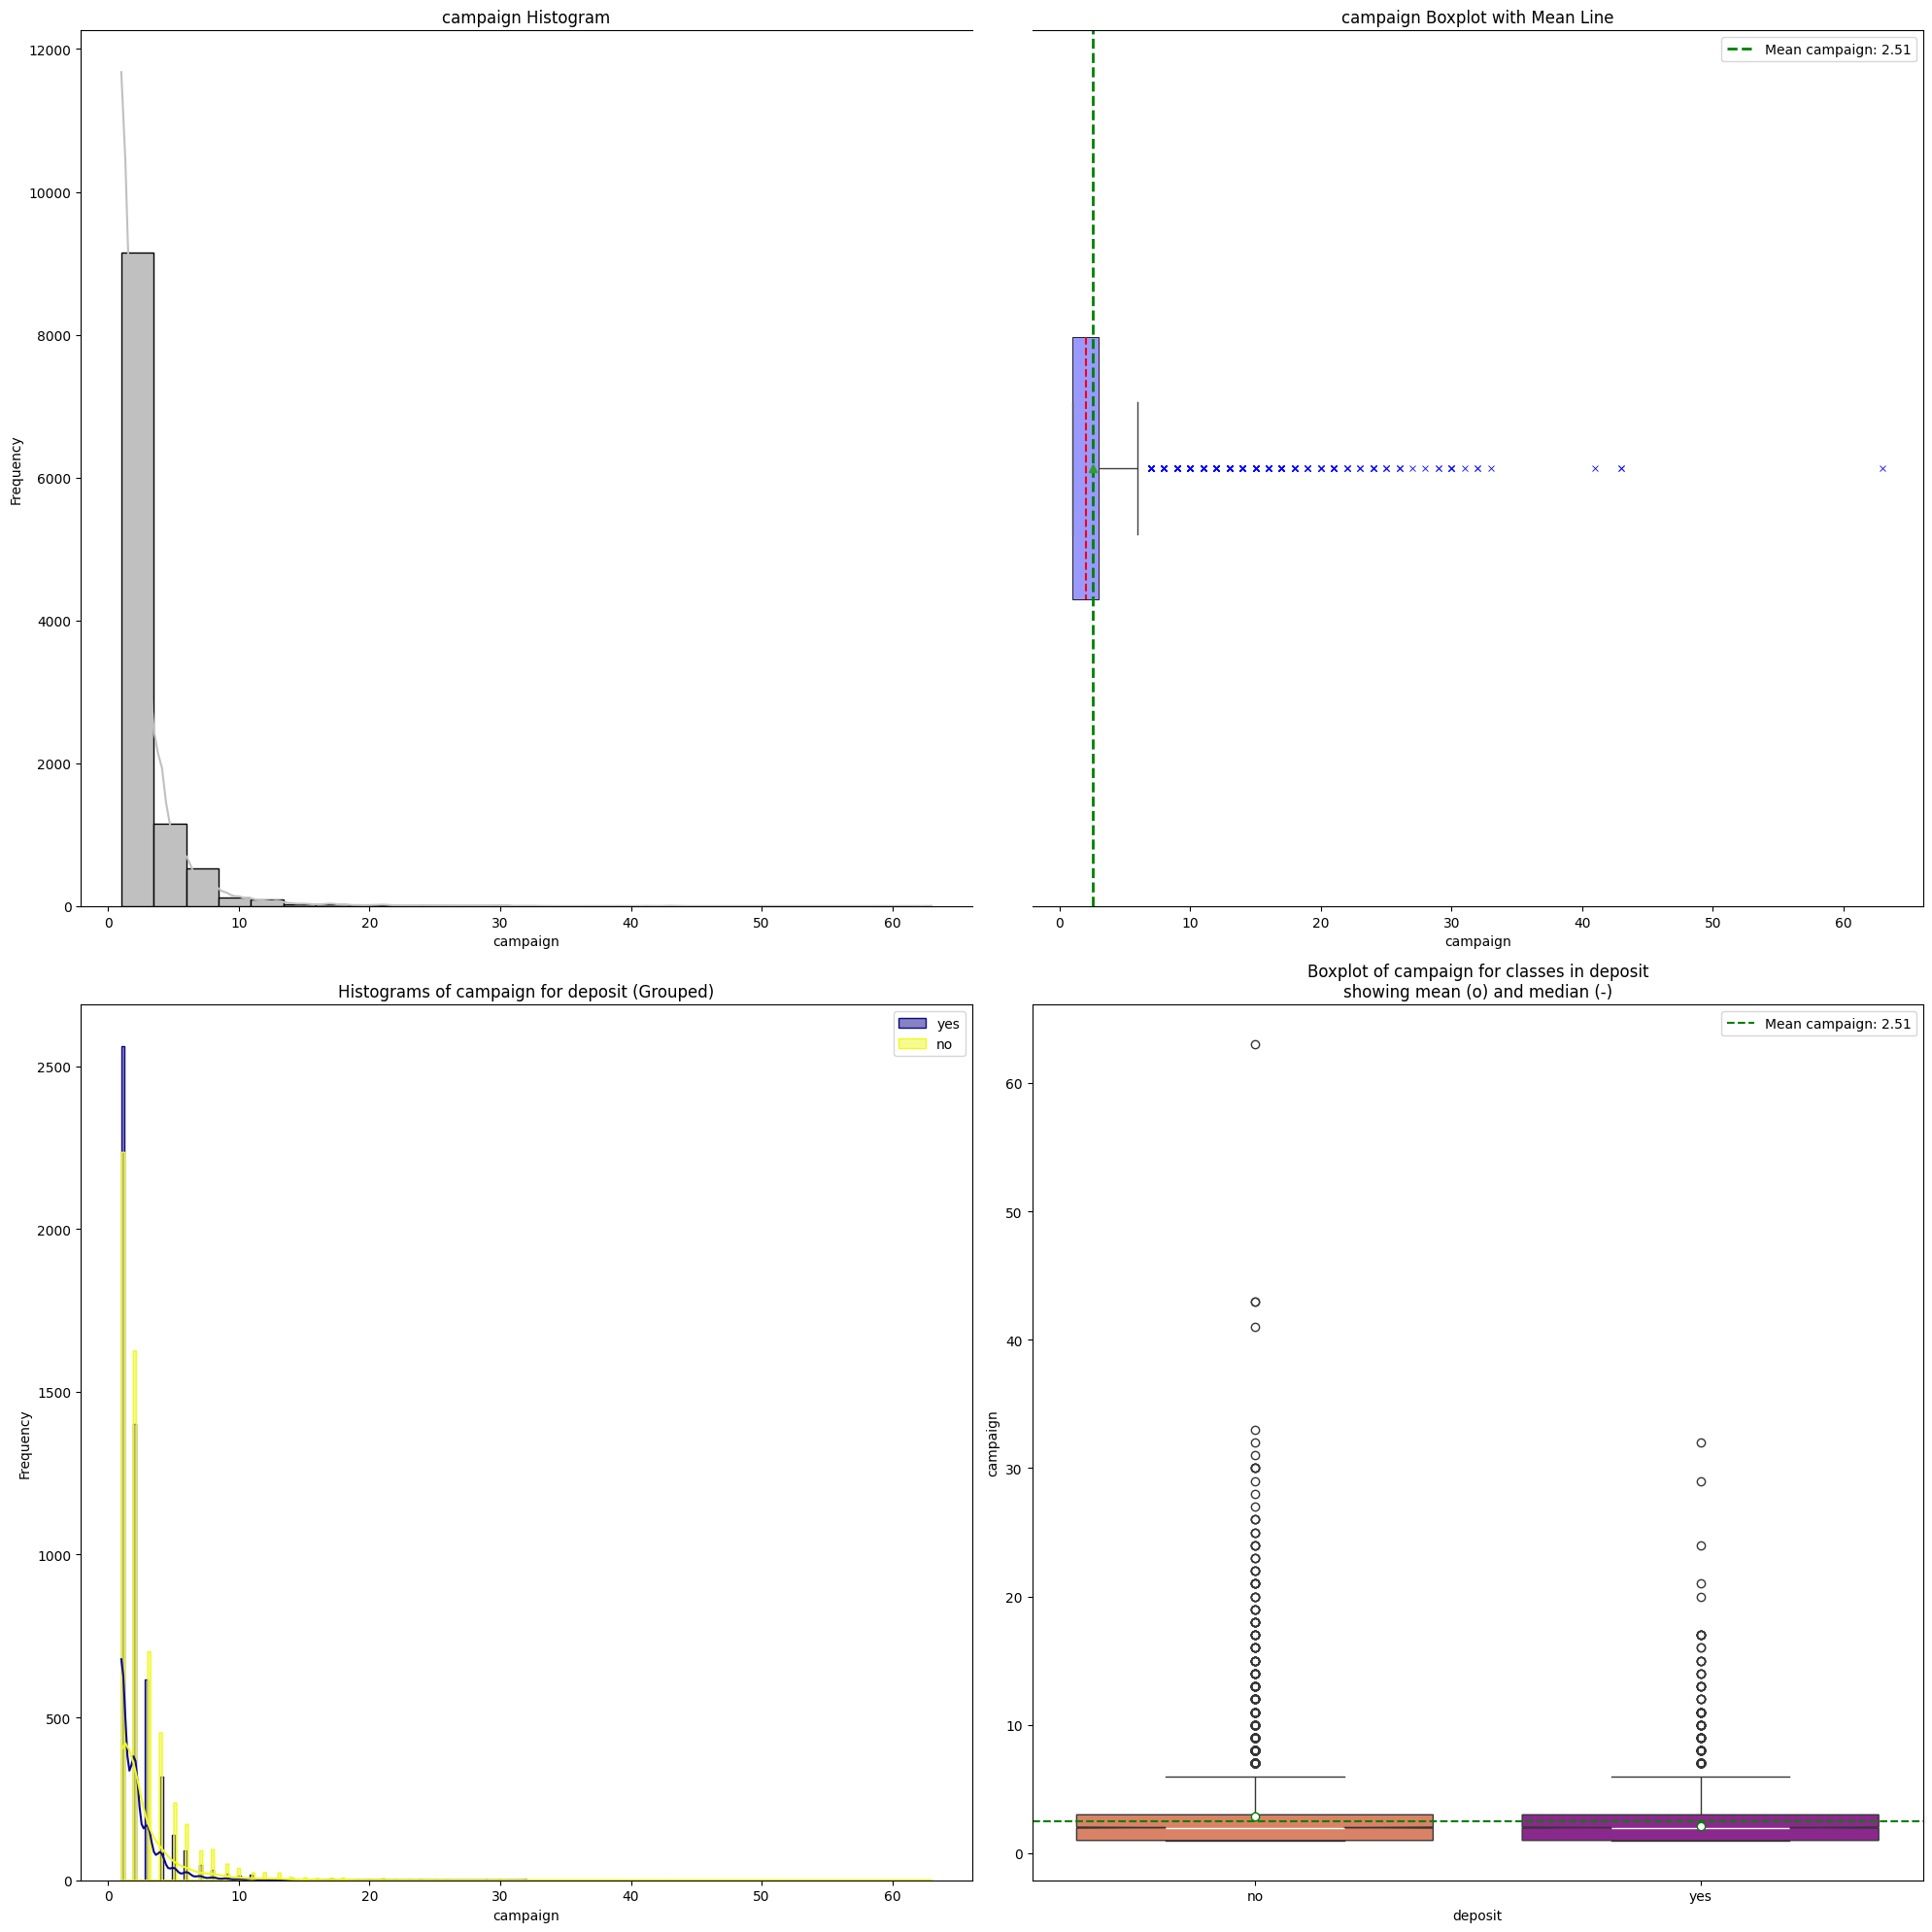

pdays


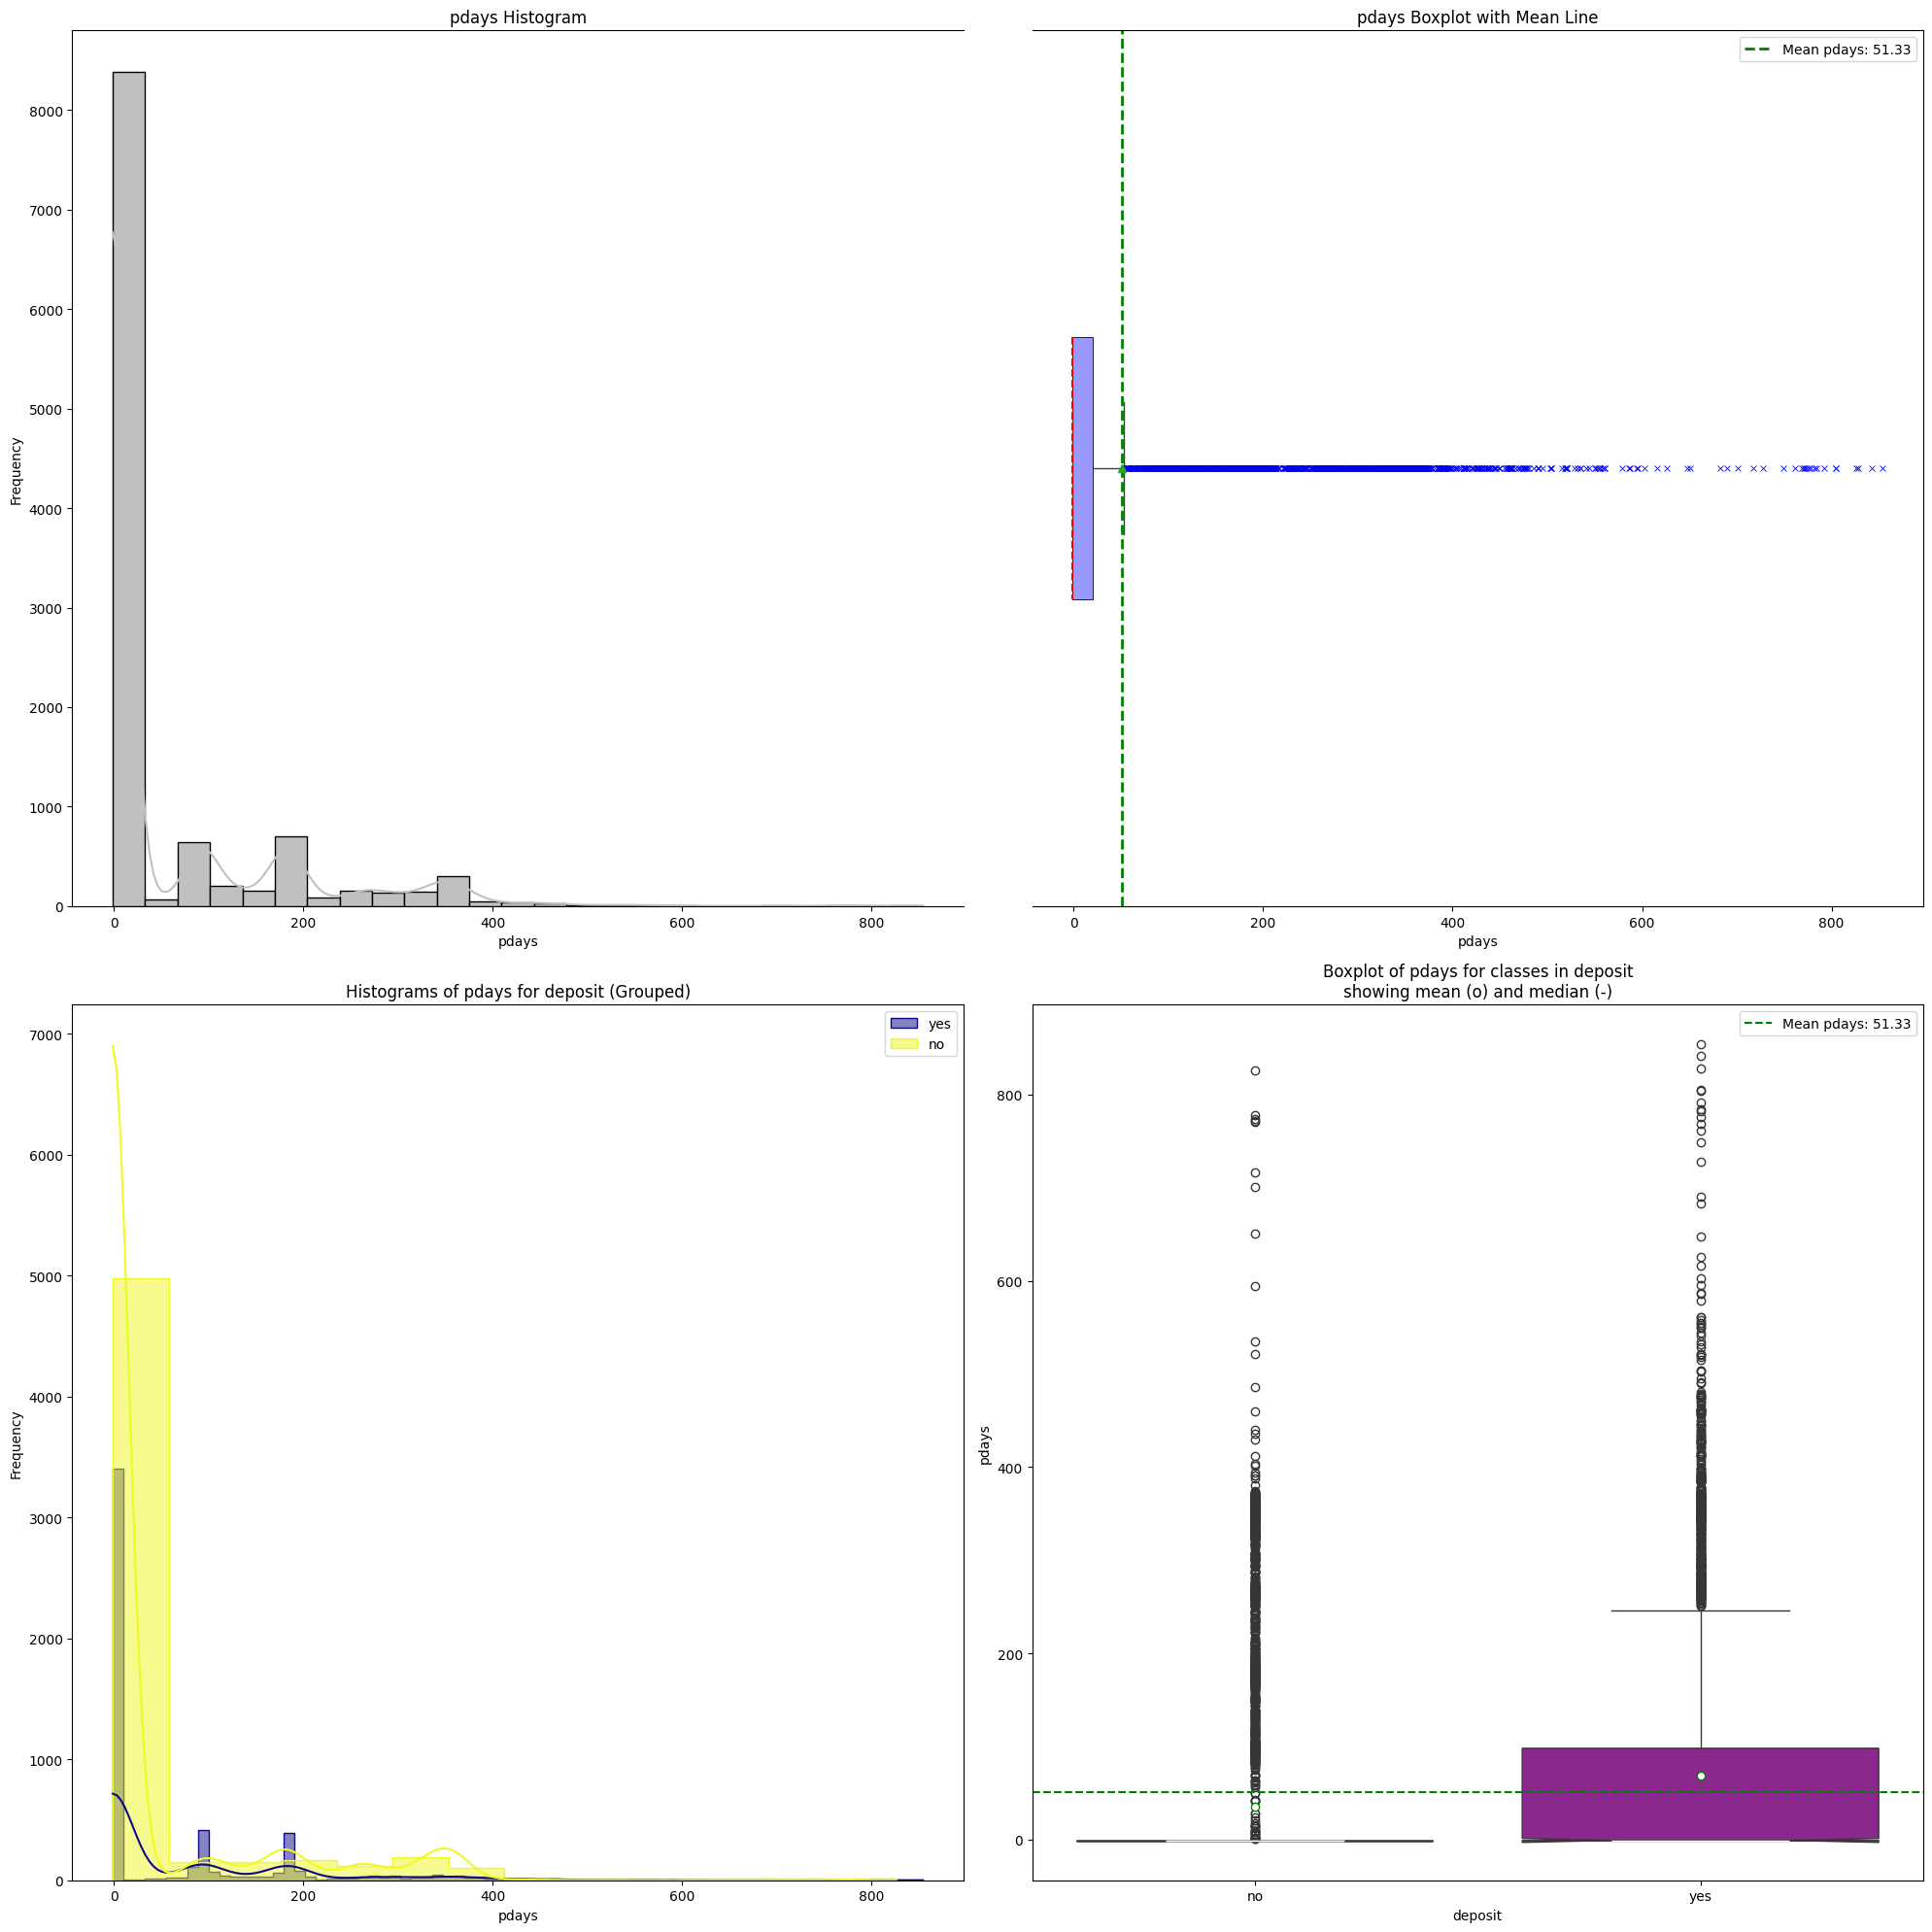

previous


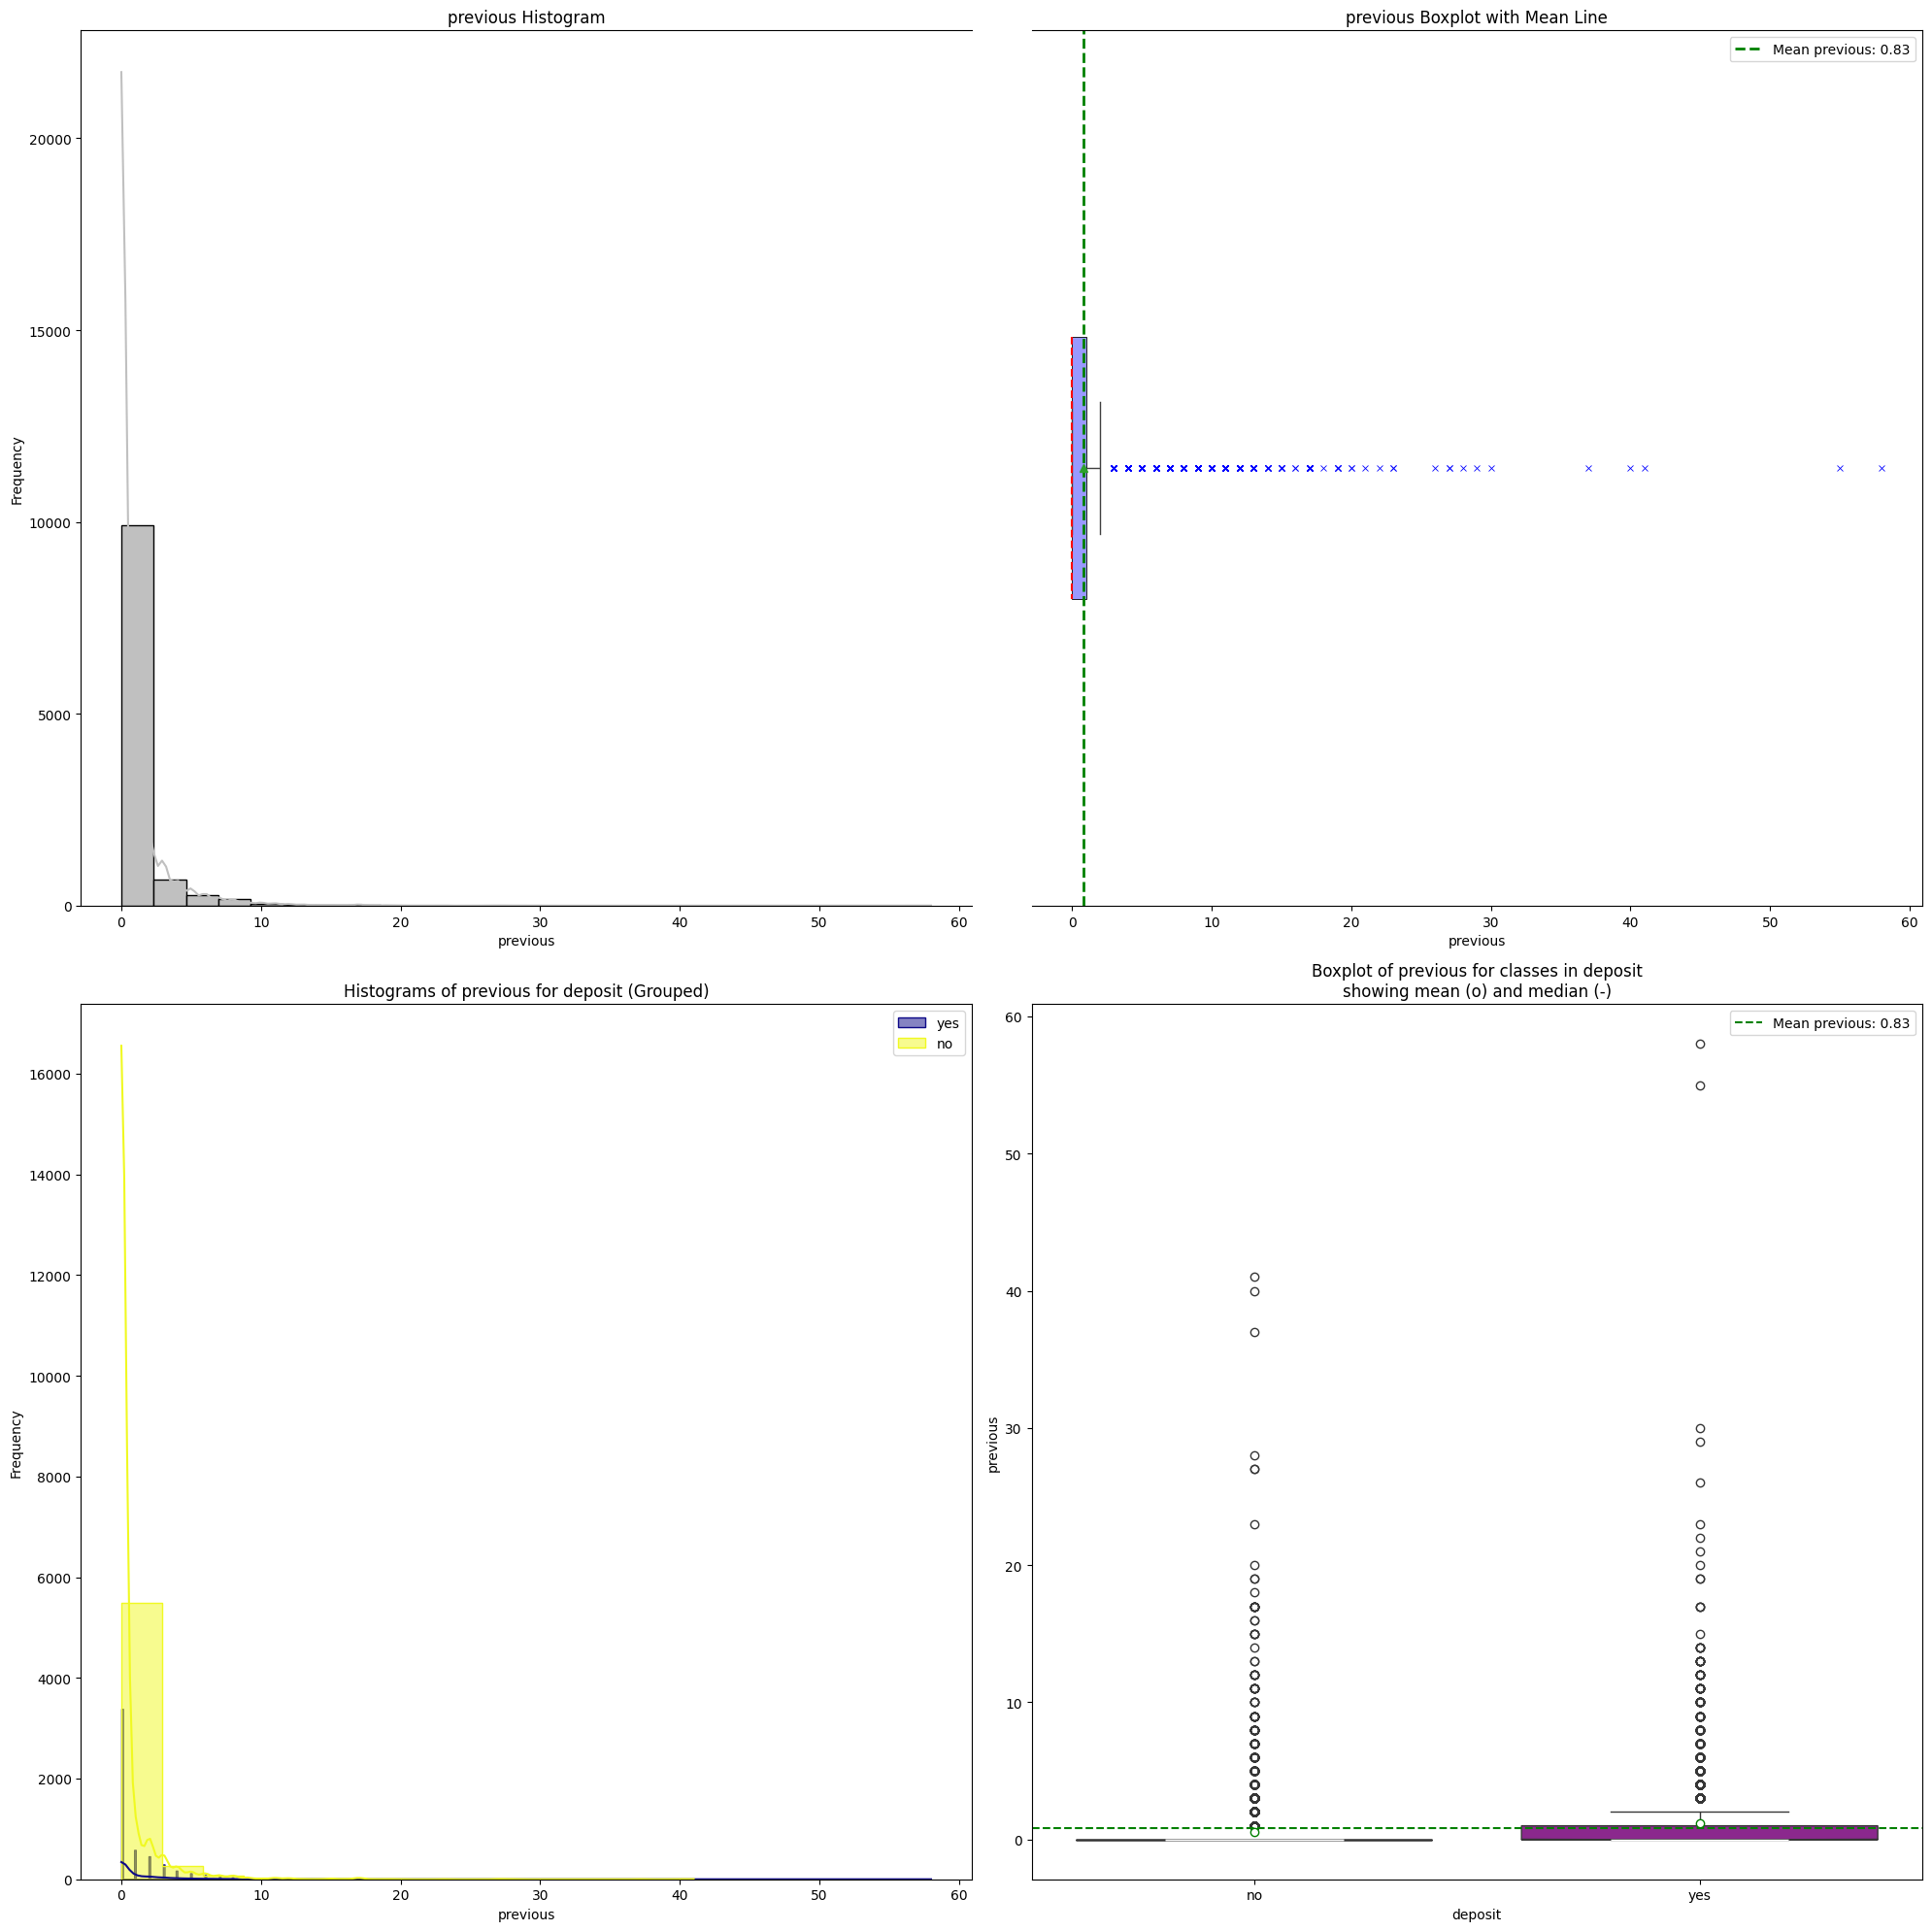

In [11]:
for col in numFeatures:
    print(f'{col}')
    viz.plotAll4(df, cat_col=target, num_col=col, show_mean=True)

### Ejercicio 4

A partir de las features del ejercicio 3, realiza una selección de features sencilla, utiliza la técnica que consideres conveniente y quedate con 4 features.

In [12]:
dfRedu = train_set[numFeatures + [target]]
dfRedu.head()

,age,balance,day,duration,campaign,pdays,previous,deposit
8644,46,526,31,251,3,-1,0,0
2632,46,2552,3,260,1,94,8,1
3056,25,139,11,202,1,91,1,1
1080,43,3288,21,775,3,-1,0,1
4006,37,217,23,272,2,-1,0,1


In [13]:
X = dfRedu.drop(target, axis=1)
y = dfRedu[target]

from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(random_state=42, max_depth=10)
dTree.fit(X,y)

DecisionTreeClassifier(max_depth=10, random_state=42)

<Axes: xlabel='Importance', ylabel='Feature'>

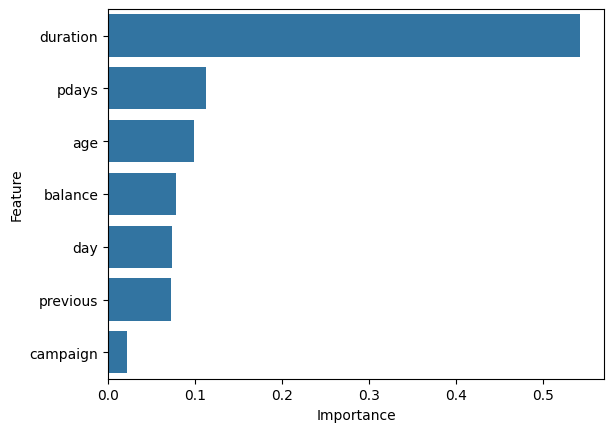

In [14]:
featureImps = pd.DataFrame({'Feature': X.columns,
                            'Importance': dTree.feature_importances_}).sort_values('Importance', ascending=False)

sns.barplot(data=featureImps, x='Importance', y='Feature')

In [15]:
X = dfRedu[featureImps['Feature'].values[:4]]
X.head()

,duration,pdays,age,balance
8644,251,-1,46,526
2632,260,94,46,2552
3056,202,91,25,139
1080,775,-1,43,3288
4006,272,-1,37,217


### Ejercicio 5

Crea los pares X,y para train y test y escala los datos. ¿Por qué debemos hacerlo?

In [16]:
X_train = train_set[X.columns]
y_train = train_set[target]

X_test = test_set[X.columns]
y_test = test_set[target]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.fit_transform(X_test)

### Ejercicio 6

 Crea un modelo de regresión logistica y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [17]:
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
logReg = LogisticRegression(random_state=42)

trainStart = time.time()
logReg.fit(X_trainScaled, y_train)
trainEnd = time.time()
trainingTime = trainEnd - trainStart

predStart = time.time()
ypred = logReg.predict(X_testScaled)
predEnd = time.time()
predictionTime = predEnd - predStart

testMetrics = pd.DataFrame({'Accuracy': accuracy_score(y_test, ypred),
                            'Precision': precision_score(y_test, ypred, average='macro'),
                            'Recall': recall_score(y_test, ypred),
                            'Train time': trainingTime,
                            'Predict Time': predictionTime}, index=['Logistic'])
testMetrics


,Accuracy,Precision,Recall,Train time,Predict Time
Logistic,0.738468,0.745566,0.62949,0.038105,0.000384


### Ejercicio 7

Crea un modelo MLP, con sklearn, con dos hidden layers de 100 neuronas c/u y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
mlpCLF = MLPClassifier(random_state=42, hidden_layer_sizes=(100, 100), max_iter=100)

trainStart = time.time()
mlpCLF.fit(X_trainScaled, y_train)
trainEnd = time.time()
trainingTime = trainEnd - trainStart

predStart = time.time()
ypred = mlpCLF.predict(X_testScaled)
predEnd = time.time()
predictionTime = predEnd - predStart

mlpTestMetrics = pd.DataFrame({'Accuracy': accuracy_score(y_test, ypred),
                            'Precision': precision_score(y_test, ypred, average='macro'),
                            'Recall': recall_score(y_test, ypred),
                            'Train time': trainingTime,
                            'Predict Time': predictionTime}, index=['MLP'])
mlpTestMetrics


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


,Accuracy,Precision,Recall,Train time,Predict Time
MLP,0.790864,0.79104,0.756144,7.602003,0.004762


### Ejercicio 8

Compara los dos modelos. En un caso real, ¿Con cuál modelo te quedarías? ¿Por qué?

In [21]:
testMetrics = pd.concat([testMetrics, mlpTestMetrics])
testMetrics

,Accuracy,Precision,Recall,Train time,Predict Time
Logistic,0.738468,0.745566,0.629490,0.038105,0.000384
MLP,0.790864,0.791040,0.756144,7.602003,0.004762
